[View in Colaboratory](https://colab.research.google.com/github/saranyamandava/Lambda-School-DataScience/blob/master/week10_Image_Filtering_Coding_Challenge_1.ipynb)

# Image Filtering Coding Challenge

Images are large grids of color values. Techniques have been developed over many years with the intention of extracting information from images. This coding challenge explains one of the most common and most basic techniques, filtering via convolution.

### An Image
![Grid](https://www.dropbox.com/s/gkualdmkhsbx33s/image%20grid.png?raw=1)

The most common interpretation of an image (the array interpretation) is that each of the above cells holds a brightness value. When the color values are displayed as a pixel brightness, you see an image. For many image processing techniques a better interpretation of an image is this: Each pair of crossing lines is where the brightness value is stored, and the image is actually the 2d surface of a function as we've studied. This interpretation allows us to measure half-pixel values such as `I[0.5,0.5]`.

### A Filter
![Filter](https://www.dropbox.com/s/srf7daosbz9qapj/image%20filter.png?raw=1)

### Convolution

Many image processing techniques depend on this basic building block: convolution. Image convolution involves laying the filter "on top" of the image and computing the sum of the products of the overlapping values. The resulting value is stored in a new image. The filter (or mask) is moved by one pixel, and the process is repeated across the entire image.

$C_{i,j} = \sum_{F_{x,y}}{ I_{i-x,j-y}F_{x,y}}$

In [18]:
!pip install imageio

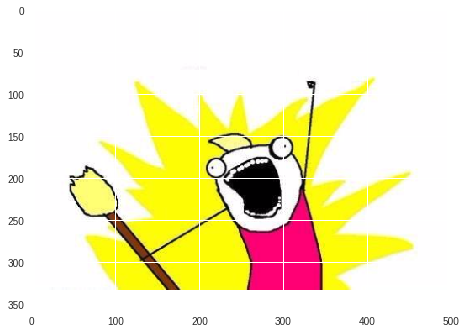

In [19]:
# Convolution in action
import imageio
import matplotlib.pyplot as plt

I = imageio.imread('https://www.dropbox.com/s/dv3vtiqy439pzag/all_the_things.png?raw=1')
plt.imshow(I)

(356, 503)
(5, 5)


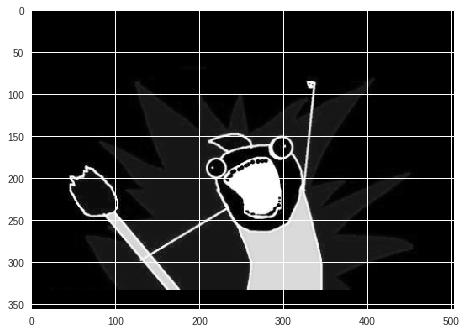

In [25]:
import numpy as np
import scipy.ndimage as nd
F = np.array([[1,1,1,1,1],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[-1,-1,-1,-1,-1]])

# Convert I to grayscale, so it will be MxNx1 instead of MxNx4
from skimage import color
I_g = color.rgb2gray(I)
print(I_g.shape)
print(F.shape)
C = nd.convolve(I_g,F)

plt.imshow(I_g)

The above convolution is a form of "edge detection", responding most strongly where the brightness of the image changes suddenly.

### Library mode

Use the [tutorial](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html) and the [other tutorial](https://www.pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/) to study Canny edge detection and write your own implementation using the above image. How does it differ from the image detection result above?

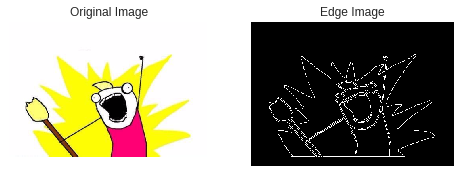

In [26]:
import cv2
import os
edges = cv2.Canny(I,100,200)

plt.subplot(121),plt.imshow(I,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Stretch goal

### Roll your own

Remember the equation above? 

$C_{i,j} = \sum_{F_{x,y}}{ I_{i-x,j-y}F_{x,y}}$

Write your own implementation of the above equation for convolution. All you need to do is iterate over $i,j$ to track across the image $I$, then for each pixel in $I$, iterate over $x,y$ and compute the sum of the product of each filter value with the image value at that $i,j$ coordinate.

### Edge cases important

What will you do when the mask is along the edges of the image? You can either wrap the pixel values around, or call the function for $C_{i,j}$ undefined at that coordinate and set the value to $0$.

### Centered filter or $0,0$ aligned filter?

Think of the filter as being centered on each image coordinate value, so that $C_{i,j}$ and $F_{width(F)/2,height(F)/2}$ overlap during convolution. How do you need to modify the convolution equation to handle this case?

In [0]:
# reference: http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html

from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pylab
def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 4, image.shape[1] + 4))   
    image_padded[2:-2, 2:-2] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+5,x:x+5]).sum()        
    return output
  
  
  
  
img = io.imread('https://www.dropbox.com/s/dv3vtiqy439pzag/all_the_things.png?raw=1', as_grey=True)    # Load the image
img = color.rgb2gray(img) 

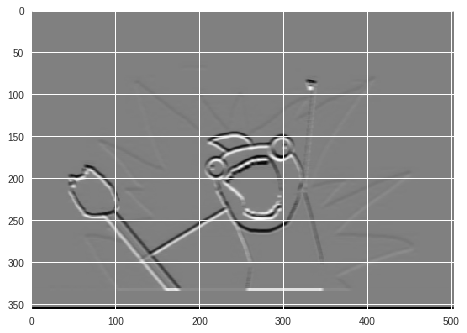

In [85]:
# Convolve the kernel and the image
kernel = np.array([[1,1,1,1,1],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[-1,-1,-1,-1,-1]])

plt.imshow(convolve2d(img,kernel), cmap=plt.cm.gray)
#plt.axis('off')
plt.show()

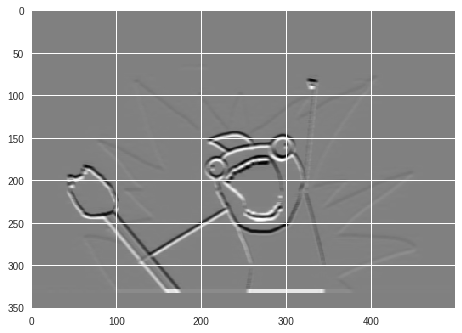

In [78]:
#Let's do this using the library function.
import scipy.signal

edges = scipy.signal.convolve2d(I_g, F, 'valid')
plt.imshow(edges,cmap = 'gray')